# Regression and Other Stories: Stents

Stents - comparing distributions. See Chapter 3 in Regression and Other Stories.

----

### Load packages



In [1]:
using StatsPlots, Distributions

### Exercise time

In [2]:
n = [104, 90]
y_bar_pre = [528.0, 490.0]
y_bar_post = [556.3, 501.8]
s_pre = [178.7,195.0]
s_post = [178.7, 190.0]
interval_width_diff = [45.1 - 11.6, 31.3 - (-7.8)]
se_diff = interval_width_diff ./ (2*quantile.(TDist.(n.-1),.975))
s_diff = se_diff .* sqrt.(n)
rho = (s_pre.^2 .+ s_post.^2 .- s_diff.^2)./(2 .* s_pre .* s_post)
b = rho.*s_post./s_pre
b = mean(b)
# note - original nb defines a diff function, this already exists in julia
#        but the signs are inverted, so define as nb_diff
nb_diff(a) =  a[1] - a[2]
diff_simple = nb_diff(y_bar_post)
diff_gain = nb_diff(y_bar_post - y_bar_pre)
diff_regression = nb_diff(y_bar_post - b*y_bar_pre)
se_simple = sqrt.(s_post.^2 ./ n)
se_diff_simple = sqrt(sum(se_simple.^2))
se_gain = sqrt.(s_pre.^2 ./ n + s_post.^2 ./ n - 2 .* rho .* s_pre .* s_post ./n)
se_diff_gain = sqrt(sum(se_gain.^2))
se_regression = sqrt.(b.^2 .* s_pre.^2 ./n + s_post.^2 ./
    n - 2 .*b .* rho .* s_pre .* s_post./n)
se_diff_regression = sqrt(sum(se_regression .^ 2))
diffs = [diff_simple, diff_gain, diff_regression]
ses = [se_diff_simple, se_diff_gain, se_diff_regression]
round.(diffs, digits=1) |> print

[54.5, 16.5, 21.4]

In [3]:
round.(ses, digits=1) |> print

[26.6, 13.0, 12.5]

In [4]:
round.(diffs ./ ses, digits=1) |> print

[2.0, 1.3, 1.7]

In [5]:
round.(2 * cdf.(Normal(), -diffs./ses), digits=2) |> print

[0.04, 0.2, 0.09]

### Bootstrap

In [6]:
z = (diffs./ses)[3]
1 - cdf(Normal(), (1.96-z)) |> print

0.40185944270270246

In [7]:
cdf(Normal(), (-1.96-z)) |> print

0.00012058303497808016

### Treadmill score

In [8]:
n = [104,90]
y_bar_pre = [4.24, 4.18]
y_bar_post = [5.46, 4.28]
s_pre = [4.82, 4.65]
s_post = [4.79, 4.98]
interval_width_diff = [2.07 - 0.37, 1.19 - (-0.99)]
se_diff = interval_width_diff ./ (2*quantile.(TDist.(n.-1),.975))
s_diff = se_diff .* sqrt.(n)
rho = (s_pre.^2 .+ s_post.^2 .- s_diff.^2)./(2 .* s_pre .* s_post)
b = rho.*s_post./s_pre
b = mean(b)
nb_diff(a) =  a[1] - a[2]
diff_simple = nb_diff(y_bar_post)
diff_gain = nb_diff(y_bar_post - y_bar_pre)
diff_regression = nb_diff(y_bar_post - b*y_bar_pre)
se_simple = sqrt.(s_post.^2 ./ n)
se_diff_simple = sqrt(sum(se_simple.^2))
se_gain = sqrt.(s_pre.^2 ./ n + s_post.^2 ./ n - 2 .* rho .* s_pre .* s_post ./n)
se_diff_gain = sqrt(sum(se_gain.^2))
se_regression = sqrt.(b.^2 .* s_pre.^2 ./n + s_post.^2 ./
    n - 2 .*b .* rho .* s_pre .* s_post./n)
se_diff_regression = sqrt(sum(se_regression .^ 2))
diffs = [diff_simple, diff_gain, diff_regression]
ses = [se_diff_simple, se_diff_gain, se_diff_regression]
round.(diffs, digits=1) |> print

[1.2, 1.1, 1.1]

In [9]:
round.(ses, digits=1) |> print

[0.7, 0.7, 0.6]

In [10]:
round.(diffs ./ ses, digits=1) |> print

[1.7, 1.6, 1.9]

In [11]:
round.(2 * cdf.(Normal(), -diffs./ses), digits=2) |> print

[0.09, 0.11, 0.06]

### Graph showing distribution shift

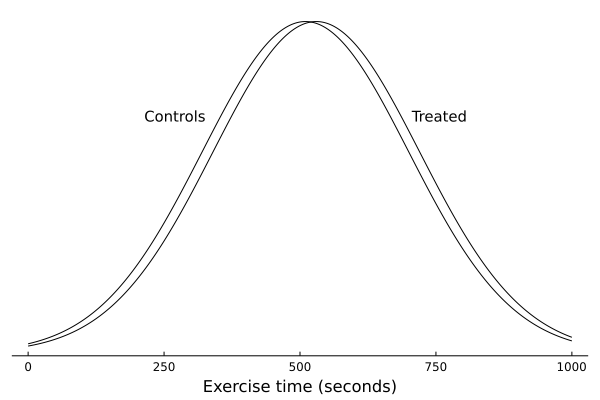

In [12]:
plot(
    0:1000,
    Normal(510,190),
    color=:black,
    grid=false,
    yticks=false,
    legend=false,
    yaxis=false,
    xlabel="Exercise time (seconds)"
)
plot!(
    0:1000,
    Normal(530,190),
    color=:black
)
annotate!(270,0.0015, text("Controls", 10))
annotate!(755,0.0015, text("Treated",10))